In [7]:
import pandas as pd
import csv
training_data = pd.read_table('/Users/reubenkarchem/GitHub/rkproject/TrainingData.csv', sep=',', header=0)
training_data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [24]:
training_data.rename(columns={'Unnamed: 0':'ID' ,'Months since Last Donation':'Last_Donation', 'Number of Donations': 'Number_of_Donations', 'Total Volume Donated (c.c.)':'Volume_Donated', 'Made Donation in March 2007':'March_Donation', 'Months since First Donation':'First_Donation'}, inplace=True)

In [25]:
training_data.head()

,ID,Last_Donation,Number_of_Donations,Volume_Donated,First_Donation,March_Donation
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [26]:
training_data.groupby('March_Donation').describe()

First_Donation          ID  Last_Donation  \
March_Donation                                                    
0              count      438.000000  438.000000     438.000000   
               mean        34.319635  368.933790      10.636986   
               std         24.519606  220.597437       8.509690   
               min          2.000000    2.000000       0.000000   
               25%         16.000000  177.250000       4.000000   
               50%         27.000000  363.500000      11.000000   
               75%         51.750000  565.750000      16.000000   
               max         98.000000  747.000000      74.000000   
1              count      138.000000  138.000000     138.000000   
               mean        33.195652  390.224638       5.637681   
               std         23.343158  204.863209       5.513013   
               min          2.000000    0.000000       0.000000   
               25%         16.000000  231.250000       2.000000   
               50%         28.000000  397.000000       4.000000   
               75%         45.750000  548.500000       6.000000   
               max         98.000000  740.000000      26.000000   

                      Number_of_Donations  Volume_Donated  
March_Donation                                             
0              count           438.000000      438.000000  
               mean              4.716895     1179.223744  
               std               4.729985     1182.496231  
               min               1.000000      250.000000  
               25%               2.000000      500.000000  
               50%               3.000000      750.000000  
               75%               6.000000     1500.000000  
               max              44.000000    11000.000000  
1              count           138.000000      138.000000  
               mean              7.681159     1920.289855  
               std               7.758194     1939.548424  
               min               1.000000      250.000000  
               25%               3.000000      750.000000  
               50%               6.000000     1500.000000  
               75%               9.000000     2250.000000  
               max              50.000000    12500.000000

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

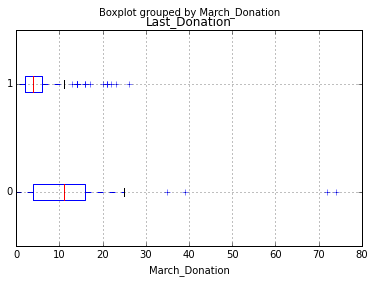

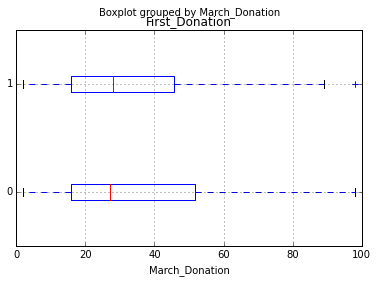

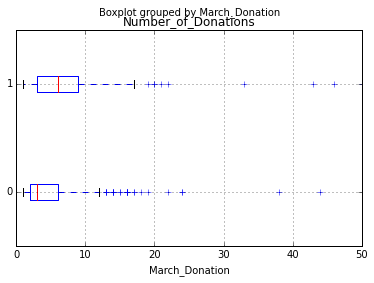

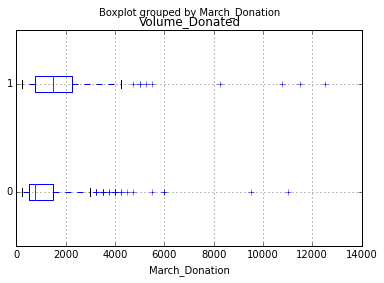

In [35]:
training_data.boxplot(column='Last_Donation', by='March_Donation', vert=False)
training_data.boxplot(column='First_Donation', by='March_Donation', vert=False)
training_data.boxplot(column='Number_of_Donations', by='March_Donation', vert=False)
training_data.boxplot(column='Volume_Donated', by='March_Donation', vert=False) #Exact same as Number of Donations

In [28]:
training_data.groupby('March_Donation').Last_Donation.describe()

March_Donation       
0               count    438.000000
                mean      10.636986
                std        8.509690
                min        0.000000
                25%        4.000000
                50%       11.000000
                75%       16.000000
                max       74.000000
1               count    138.000000
                mean       5.637681
                std        5.513013
                min        0.000000
                25%        2.000000
                50%        4.000000
                75%        6.000000
                max       26.000000
dtype: float64

In [31]:
training_data.groupby('March_Donation').First_Donation.describe()

March_Donation       
0               count    438.000000
                mean      34.319635
                std       24.519606
                min        2.000000
                25%       16.000000
                50%       27.000000
                75%       51.750000
                max       98.000000
1               count    138.000000
                mean      33.195652
                std       23.343158
                min        2.000000
                25%       16.000000
                50%       28.000000
                75%       45.750000
                max       98.000000
dtype: float64

In [36]:
training_data.groupby('March_Donation').Number_of_Donations.describe()

March_Donation       
0               count    438.000000
                mean       4.716895
                std        4.729985
                min        1.000000
                25%        2.000000
                50%        3.000000
                75%        6.000000
                max       44.000000
1               count    138.000000
                mean       7.681159
                std        7.758194
                min        1.000000
                25%        3.000000
                50%        6.000000
                75%        9.000000
                max       50.000000
dtype: float64

In [37]:
training_data.groupby('March_Donation').Volume_Donated.describe()

March_Donation       
0               count      438.000000
                mean      1179.223744
                std       1182.496231
                min        250.000000
                25%        500.000000
                50%        750.000000
                75%       1500.000000
                max      11000.000000
1               count      138.000000
                mean      1920.289855
                std       1939.548424
                min        250.000000
                25%        750.000000
                50%       1500.000000
                75%       2250.000000
                max      12500.000000
dtype: float64

In [65]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
from sklearn.cross_validation import train_test_split
feature_cols = ['First_Donation', 'Last_Donation','Number_of_Donations','Volume_Donated']
X = training_data[feature_cols]
y = training_data.March_Donation
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [66]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [67]:
y_pred = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred)
#.80556

0.805555555556


In [72]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred2)
#KNN of 5 .78472

0.784722222222


In [73]:
#CROSS VALIDATION
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
kf = KFold(25, n_folds=5, shuffle=False)

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print scores
print scores.mean()

[ 0.77011494  0.75862069  0.6744186   0.73255814  0.80232558]
0.747607591553


[0.65974338412189248, 0.75920876770916867, 0.73381448810478478, 0.75928896017107728, 0.74760759155306067, 0.77316225608126177, 0.74995990376904564, 0.75920876770916867, 0.74057738572574183, 0.75223202352312213, 0.75453087409783481, 0.7545308740978347, 0.74295642876236301, 0.74990644212777335, 0.73833199679230144, 0.73838545843357384, 0.7430098904036353, 0.73838545843357384, 0.7430366212242715, 0.74536220261962038, 0.73605987703822495, 0.75001336541031804, 0.74071103982892272, 0.75233894680566693, 0.75233894680566693, 0.75233894680566693, 0.75233894680566693, 0.75233894680566693, 0.75233894680566693, 0.75233894680566693]


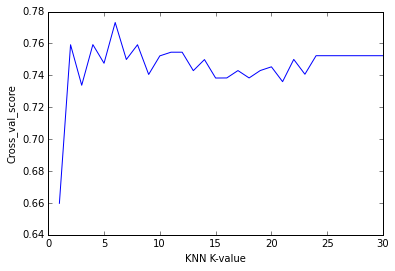

In [84]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

plt.plot(k_range, k_scores)
plt.xlabel('KNN K-value')
plt.ylabel('Cross_val_score')
#k=6 is the highest